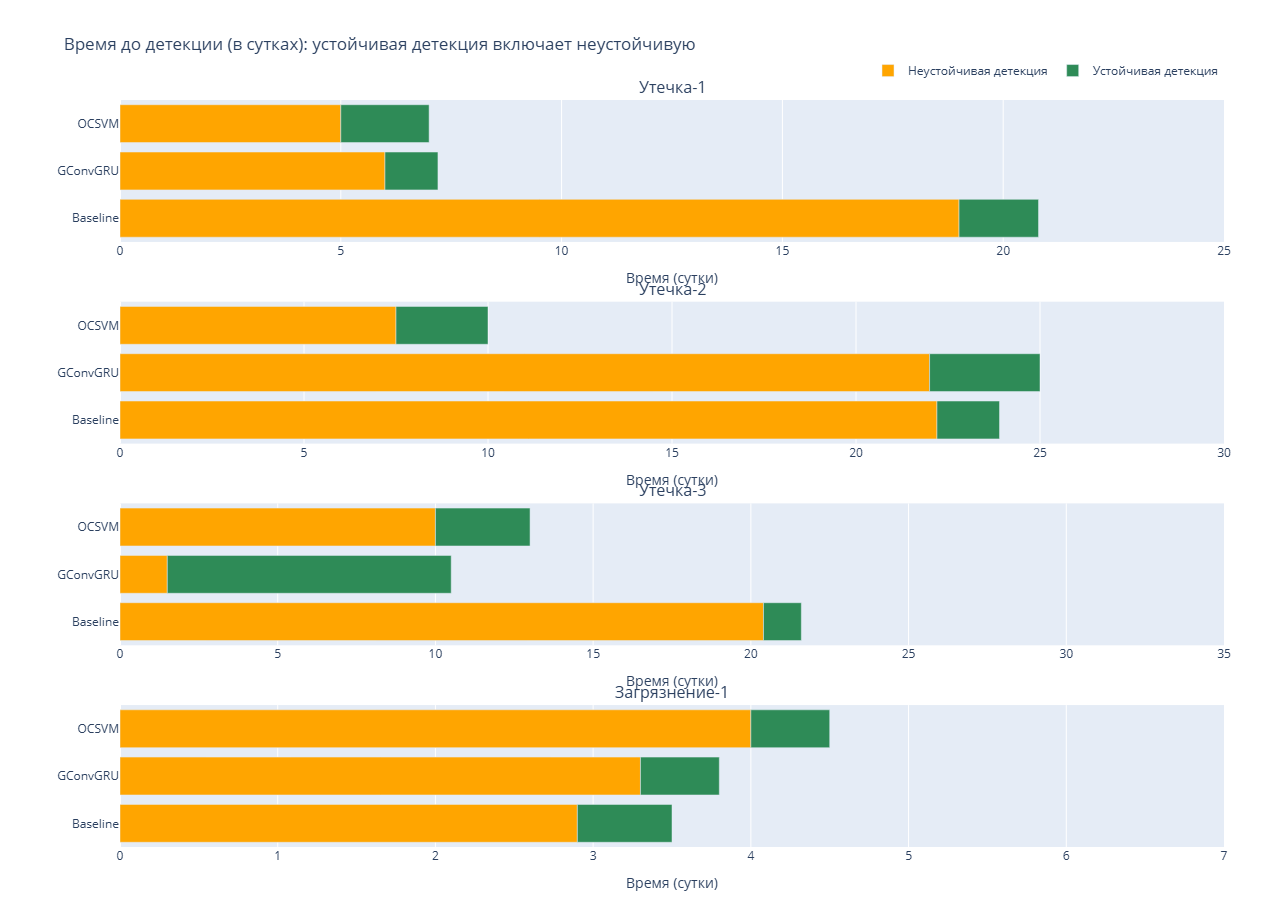

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Данные (в сутках)
models = ["Baseline", "GConvGRU", "OCSVM"]
experiments = ["Утечка-1", "Утечка-2", "Утечка-3", "Загрязнение-1"]

# Максимумы по каждому эксперименту
x_max = {
    "Утечка-1": 25,
    "Утечка-2": 30,
    "Утечка-3": 35,
    "Загрязнение-1": 7
}

data = {
    "Baseline": {
        "Утечка-1": (19.0, 20.8),
        "Утечка-2": (22.2, 23.9),
        "Утечка-3": (20.4, 21.6),
        "Загрязнение-1": (2.9, 3.5)
    },
    "GConvGRU": {
        "Утечка-1": (6.0, 7.2),
        "Утечка-2": (22.0, 25.0),
        "Утечка-3": (1.5, 10.5),
        "Загрязнение-1": (3.3, 3.8)
    },
    "OCSVM": {
        "Утечка-1": (5.0, 7.0),
        "Утечка-2": (7.5, 10.0),
        "Утечка-3": (10.0, 13.0),
        "Загрязнение-1": (4.0, 4.5)
    }
}

# Цвета
color_unstable = '#FFA500'    # Неустойчивая
color_stable_only = '#2E8B57' # Устойчивая (доп. часть)

fig = make_subplots(
    rows=len(experiments), cols=1,
    subplot_titles=experiments,
    vertical_spacing=0.08
)

model_order = ["Baseline", "GConvGRU", "OCSVM"]
y_labels = model_order

for i, exp in enumerate(experiments):
    unstable = []
    stable_phase = []
    base_stable = []
    
    for model in model_order:
        t_unstable, t_stable = data[model][exp]
        unstable.append(t_unstable)
        stable_phase.append(t_stable - t_unstable)
        base_stable.append(t_unstable)
    
    # Неустойчивая детекция
    fig.add_trace(
        go.Bar(
            y=y_labels,
            x=unstable,
            orientation='h',
            name="Неустойчивая детекция",
            marker_color=color_unstable,
            showlegend=(i == 0)
        ),
        row=i+1, col=1
    )
    
    # Стабильная фаза (наложена)
    fig.add_trace(
        go.Bar(
            y=y_labels,
            x=stable_phase,
            base=base_stable,
            orientation='h',
            name="Устойчивая детекция",
            marker_color=color_stable_only,
            showlegend=(i == 0)
        ),
        row=i+1, col=1
    )
    
    # Устанавливаем максимум по оси X для этого подграфика
    fig.update_xaxes(
        title_text="Время (сутки)",
        range=[0, x_max[exp]],  # ← вот здесь задаём максимум
        row=i+1, col=1
    )

# Общие настройки
fig.update_layout(
    title="Время до детекции (в сутках): устойчивая детекция включает неустойчивую",
    barmode='overlay',
    height=900,
    width=800,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(l=120, r=50, t=100, b=50),
    bargap=0.2
)

fig.show()